<a href="https://colab.research.google.com/github/sinku29/Data-Science-Assignment/blob/main/Delivery_time_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("delivery_time.csv")
print(data)

    Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [13]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [14]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

Text(0.5, 1.0, 'Scatterplot Delivery Time vs Sorting Time')

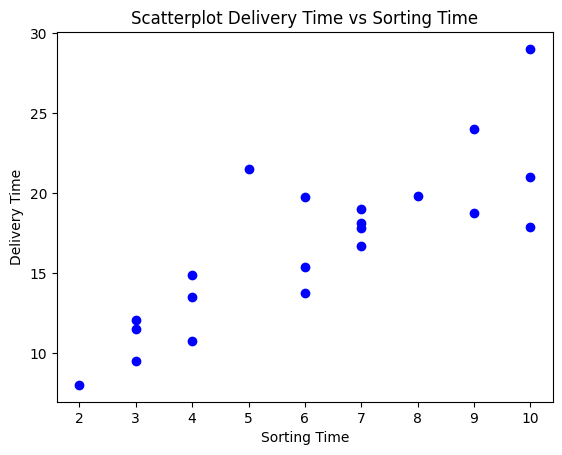

In [15]:
#Scatterplots
plt.plot(data['Sorting Time'], data['Delivery Time'], 'bo')
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.title('Scatterplot Delivery Time vs Sorting Time')

<Axes: xlabel='Sorting Time', ylabel='Density'>

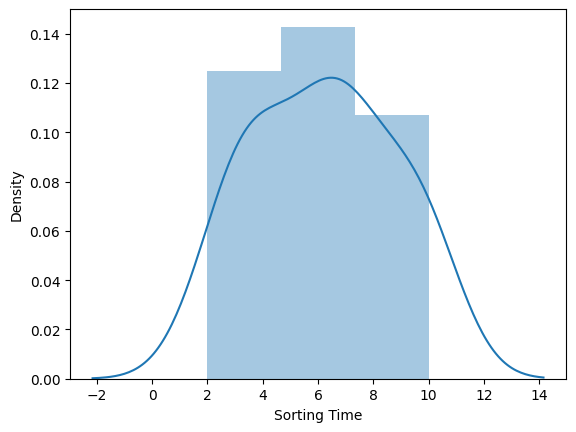

In [16]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.distplot(data['Sorting Time'])

<Axes: xlabel='Delivery Time', ylabel='Density'>

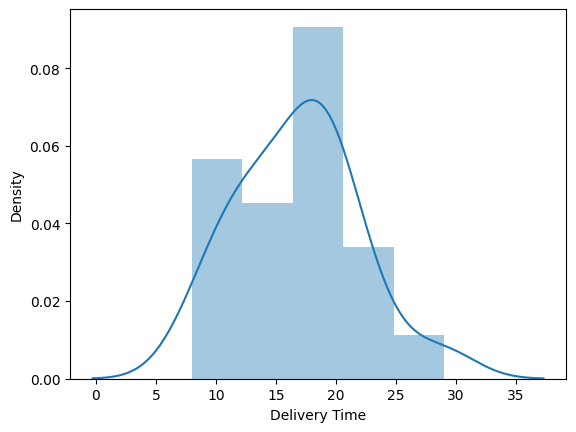

In [17]:
sns.distplot(data['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

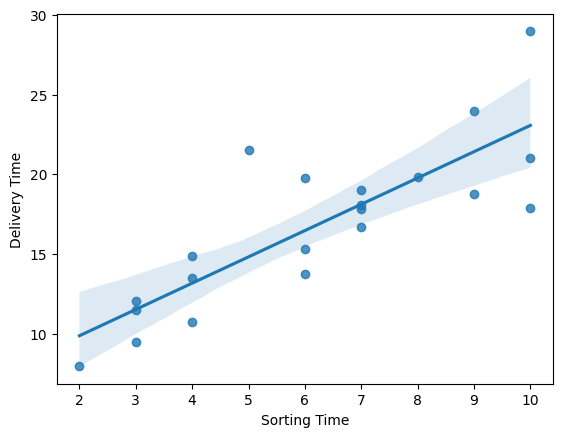

In [18]:
sns.regplot(x="Sorting Time", y="Delivery Time", data=data)

# Correlation

In [19]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


Fitting a Linear Regression Model

In [21]:
data = data.rename(columns={'Delivery Time': 'Delivery_Time', 'Sorting Time': 'Sorting_Time'})
import statsmodels.formula.api as smf
model = smf.ols('Delivery_Time ~ Sorting_Time',data = data).fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 18 Feb 2024   Prob (F-statistic):           3.98e-06
Time:                        03:08:55   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#Coefficients
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [24]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [25]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Predict for new data point

In [27]:
#Predict for sortingtime 2.5,5,7.5,10
newdata=pd.Series([2.5,5,7.5,10])

In [30]:
data_pred=pd.DataFrame(newdata,columns=['Sorting_Time'])

In [31]:
model.predict(data_pred)

0    10.705284
1    14.827833
2    18.950383
3    23.072933
dtype: float64